In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv(r"C:\Users\devan\Downloads\stu123.csv")

In [33]:
dp=pd.read_csv(r"C:\Users\devan\Downloads\stu456.csv")

In [34]:
df.head()

,Roll no,Name,Gender,Sem,Batch,Sub1,Sub2,Sub3
0,1,NISHA,F,3,A,60.0,48,74
1,2,PRATYUSH,M,3,A,57.0,50,39
2,3,PUNEET,M,3,A,NaN,65,43
3,4,RAHUL,M,3,B,55.0,55,44
4,5,AKANSHA,F,3,B,59.0,45,47


In [35]:
dp.head()

,Name,Sub4,Sub5,Sub6
0,NISHA,56.0,51,78
1,PRATYUSH,48.0,50,54
2,PUNEET,56.0,65,49
3,RAHUL,55.0,12,44
4,AKANSHA,58.0,45,48


In [36]:
#combined DF
df1=pd.merge(df,dp,on="Name")

In [44]:
df1.head()

,Roll no,Name,Gender,Sem,Batch,Sub1,Sub2,Sub3,Sub4,Sub5,Sub6
4,5,AKANSHA,F,3,B,59.000000,45,47,58.0,45,48
0,1,NISHA,F,3,A,60.000000,48,74,56.0,51,78
15,16,PRATIMA,F,5,C,42.000000,51,36,41.0,56,57
1,2,PRATYUSH,M,3,A,57.000000,50,39,48.0,50,54
2,3,PUNEET,M,3,A,51.058824,65,43,56.0,65,49


In [45]:
#CHECK FOR MISSING DATA
df1.isnull().sum()

Roll no    0
Name       0
Gender     0
Sem        0
Batch      0
Sub1       0
Sub2       0
Sub3       0
Sub4       0
Sub5       0
Sub6       0
dtype: int64

In [46]:
#Handle missing data
df1['Sub4']=df1['Sub4'].fillna(df1['Sub4'].mean())
df1['Sub1']=df1['Sub1'].fillna(df1['Sub1'].mean())

In [54]:
#Handel duplicate data
df1.sort_values("Name", inplace = True) 
df1.drop_duplicates(subset ="Name", 
                     keep = False, inplace = True)    
df1

,Roll no,Name,Gender,Sem,Batch,Sub1,Sub2,Sub3,Sub4,Sub5,Sub6
4,5,AKANSHA,F,3,B,59.000000,45,47,58.0000,45,48
0,1,NISHA,F,3,A,60.000000,48,74,56.0000,51,78
15,16,PRATIMA,F,5,C,42.000000,51,36,41.0000,56,57
1,2,PRATYUSH,M,3,A,57.000000,50,39,48.0000,50,54
2,3,PUNEET,M,3,A,51.058824,65,43,56.0000,65,49
3,4,RAHUL,M,3,B,55.000000,55,44,55.0000,12,44
5,6,RISHABH,M,3,B,53.000000,51,55,53.0000,51,55
6,7,ROHIT,M,3,C,48.000000,54,62,51.0625,45,42
7,8,SAKSHI,F,3,C,44.000000,46,40,45.0000,46,40
17,18,SARFARAZ,M,5,C,53.000000,47,50,39.0000,55,50


In [12]:
df1.isnull().sum()

Roll no    0
Name       0
Gender     0
Sem        0
Batch      0
Sub1       0
Sub2       0
Sub3       0
Sub4       0
Sub5       0
Sub6       0
dtype: int64

In [13]:
#Handel duplicate data
df1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

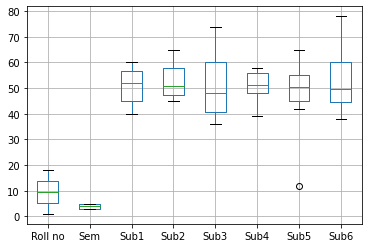

In [15]:
#Detect and remove outliers
df1.boxplot()

In [28]:
df1.pivot(index='Name', columns='Gender', values='Sub1')

Gender,F,M
Name,,
AKANSHA,59.0,NaN
NISHA,60.0,NaN
PRATIMA,42.0,NaN
PRATYUSH,NaN,57.000000
PUNEET,NaN,51.058824
RAHUL,NaN,55.000000
RISHABH,NaN,53.000000
ROHIT,NaN,48.000000
SAKSHI,44.0,NaN


In [17]:
#ReIndex DF by column
column=['Name','Gender','Roll no','Sem','Batch','Sub5','Sub2','Sub6','Sub1','Sub3','Sub4']
df1.reindex(column,axis='columns')

,Name,Gender,Roll no,Sem,Batch,Sub5,Sub2,Sub6,Sub1,Sub3,Sub4
0,NISHA,F,1,3,A,51,48,78,60.000000,74,56.0000
1,PRATYUSH,M,2,3,A,50,50,54,57.000000,39,48.0000
2,PUNEET,M,3,3,A,65,65,49,51.058824,43,56.0000
3,RAHUL,M,4,3,B,12,55,44,55.000000,44,55.0000
4,AKANSHA,F,5,3,B,45,45,48,59.000000,47,58.0000
5,RISHABH,M,6,3,B,51,51,55,53.000000,55,53.0000
6,ROHIT,M,7,3,C,45,54,42,48.000000,62,51.0625
7,SAKSHI,F,8,3,C,46,46,40,44.000000,40,45.0000
8,SARTHAK,M,9,3,C,45,61,63,41.000000,63,49.0000
9,TARA,F,10,5,A,61,61,38,43.000000,38,43.0000
